In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib import colormaps
from result import *
from adjustText import adjust_text

def load_pkl(path):
    with open(path, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

FILTERING_S_ALG = ['SD_LONGEST', 'SD_EARLIEST', 'SD_RANDOM','SD_OUR']
FILTERING_C_ALG = ['C_EARLIEST', 'C_RANDOM', 'C_OUR']
FILTERING_UE_ALG = ['SS_LONGEST', 'SS_RANDOM','SS_OUR']
FILTERING_ACCESS_OPPORTUNITIES_ALG = ['56', 'x8', 'x12']
FILTER_MAX_AND_MIN = True
FILTER_PERCENT = 1


directory_path = './'
result = {}

def translate_label(source_alg, candidate_alg, ue_alg):
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'A'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'B'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'C'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'D'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'E'
    if ue_alg == 'SS_RANDOM' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'F'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_RANDOM':
        return 'G'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_EARLIEST':
        return 'H'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_RANDOM' and source_alg == 'SD_LONGEST':
        return 'I'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_RANDOM':
        return 'J'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_EARLIEST':
        return 'K'
    if ue_alg == 'SS_LONGEST' and candidate_alg == 'C_EARLIEST' and source_alg == 'SD_LONGEST':
        return 'L'
    if ue_alg == 'SS_OUR' and candidate_alg == 'C_OUR' and source_alg == 'SD_OUR':
        return 'L\nC\nH'
    

# Loop through the files in the directory
for filename in os.listdir(directory_path):
    # Check if the file ends with .pkl
    if filename.endswith('.pkl'):
        print(filename)
        source_alg = filename[:-4].split('|')[0]
        candidate_alg = filename[:-4].split('|')[1]
        ue_alg = filename[:-4].split('|')[2]
        access_opportunities = filename[:-4].split('|')[3]
        if (source_alg in FILTERING_S_ALG
        and candidate_alg in FILTERING_C_ALG
        and ue_alg in FILTERING_UE_ALG
        and access_opportunities in FILTERING_ACCESS_OPPORTUNITIES_ALG):
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)] = load_pkl(filename)
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'] = np.array(result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['time_sat_matrix'])[:, 5000:20000]
            result[(source_alg, candidate_alg, ue_alg, access_opportunities)]['paper_label'] = translate_label(source_alg, candidate_alg, ue_alg)

result = prepare_result(result, FILTER_MAX_AND_MIN, FILTER_PERCENT)

SD_LONGEST|C_RANDOM|SS_RANDOM|56.pkl
SD_RANDOM|C_EARLIEST|SS_RANDOM|56.pkl
SD_LONGEST|C_EARLIEST|SS_LONGEST|56.pkl
SD_LONGEST|C_EARLIEST|SS_RANDOM|56.pkl
SD_OUR|C_OUR|SS_OUR|56.pkl
SD_EARLIEST|C_EARLIEST|SS_RANDOM|56.pkl
SD_EARLIEST|C_RANDOM|SS_LONGEST|56.pkl
SD_RANDOM|C_EARLIEST|SS_LONGEST|56.pkl
SD_RANDOM|C_RANDOM|SS_LONGEST|56.pkl
SD_EARLIEST|C_EARLIEST|SS_LONGEST|56.pkl
SD_RANDOM|C_RANDOM|SS_RANDOM|56.pkl
SD_EARLIEST|C_RANDOM|SS_RANDOM|56.pkl
SD_LONGEST|C_RANDOM|SS_LONGEST|56.pkl
C Maximum signalling value: 317 at index [(29, 13434)]
12345
D Maximum signalling value: 321 at index [(29, 13433)]
12345
L Maximum signalling value: 647 at index [(29, 14243)]
12345
F Maximum signalling value: 313 at index [(23, 9998)]
12345
L
C
H Maximum signalling value: 132 at index [(5, 921), (9, 1102)]
12345
E Maximum signalling value: 321 at index [(29, 13433)]
12345
H Maximum signalling value: 250 at index [(24, 10789)]
12345
J Maximum signalling value: 265 at index [(30, 14014)]
12345
G Maximum si

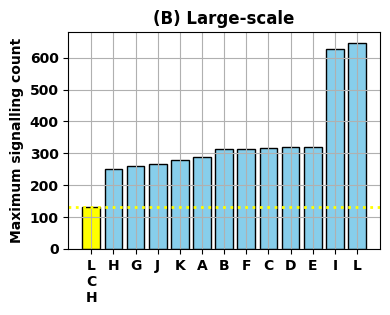

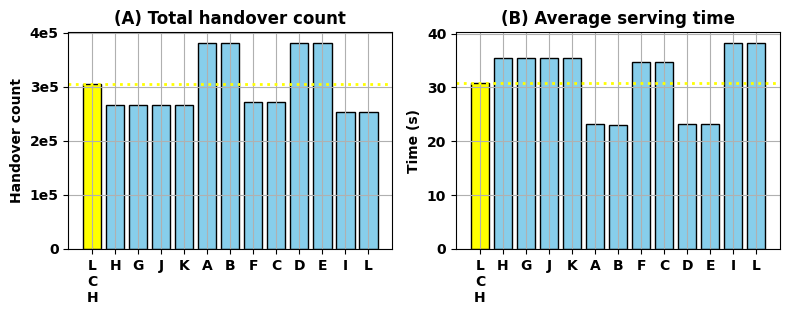

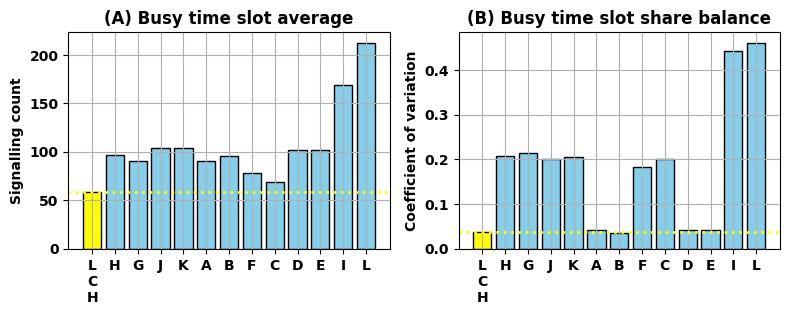

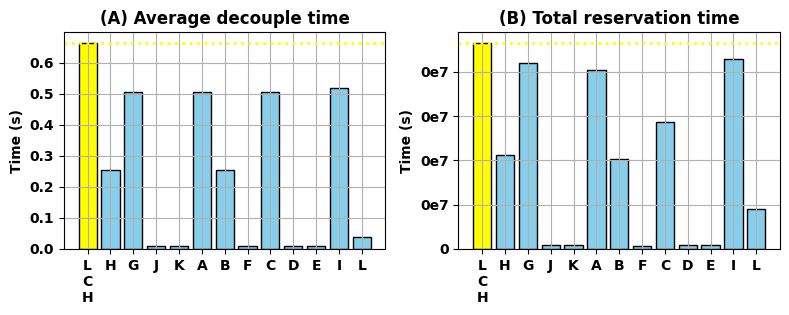

In [2]:
draw_prepared_result(result)

In [3]:
# # The figure describes the maximum signalling of each satellite
# draw_max_signalling(result)
# draw_cumulative_load_each_time(result)
# draw_total_load_each_satellite(result)
# draw_busy_hour_distribution(result)
# draw_max_reservation(result)
# draw_heatmap(result, 100)

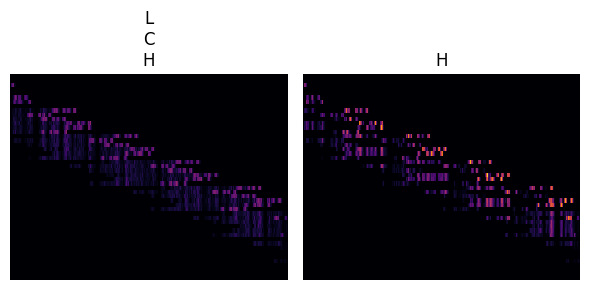

In [15]:
draw_heatmap(result, 1, "inferno")

In [22]:
count = 0
UE_list = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['ue_delay_history']
total_UE = len(UE_list)
for arr in UE_list:
    total_UE = len(UE_list)
    count += len(arr)
print(count / total_UE)

5.43694


In [ ]:
def side_effect_compute_UE_average_handover(result):
    total_access = []
    UE_access_list = result['ue_delay_history']
    count = 0
    total_UE = len(UE_access_list)
    for list in UE_access_list:
        count += len(list)
    average = count / total_UE
    return average

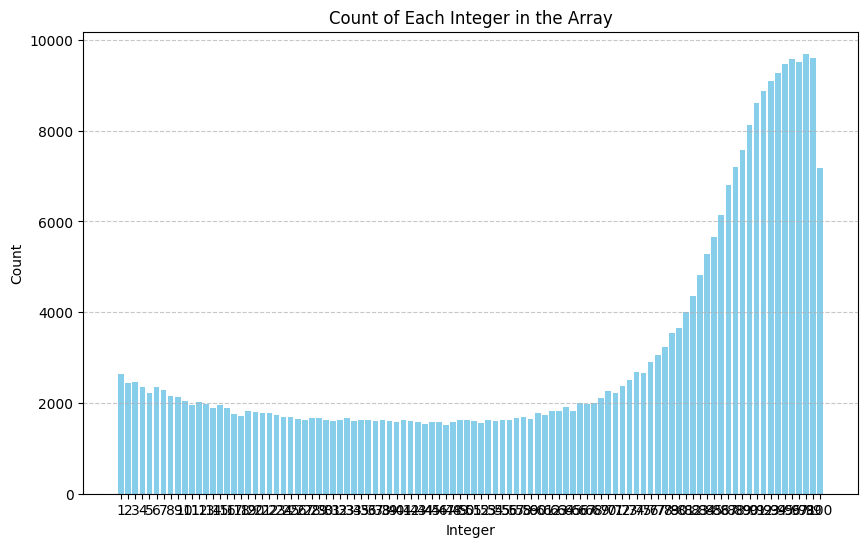

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
 
arr = []
for a in result[('SD_OUR',
  'C_OUR',
  'SS_OUR',
  '56')]['ue_delay_history']:
    arr += a
counter = Counter(arr)
 
# Extracting the integers and their counts
integers = list(counter.keys())
counts = list(counter.values())
 
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(integers, counts, color='skyblue')
plt.xlabel('Integer')
plt.ylabel('Count')
plt.title('Count of Each Integer in the Array')
plt.xticks(integers)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
result[('SD_OUR',
  'C_OUR',
  'SS_OUR',
  '56')]

{'time_sat_matrix': array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 6, 12, 14, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]),
 'total_handover': 284150,
 'max_delays': [100,
  0,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  0,
  0,
  100,
  0,
  0,
  0,
  0],
 'reservation_count': [210593,
  0,
  989053,
  471853,
  701201,
  1215398,
  1109180,
  734974,
  1394736,
  1439726,
  1365875,
  1650528,
  1513309,
  1366175,
  1353897,
  1487298,
  1367919,
  1699889,
  1497404,
  1363411,
  1352834,
  1458860,
  1447637,
  1688973,
  1449346,
  1313406,
  1434091,
  1476768,
  1472173,
  1602687,
  1435545,
  1309252,
  1107

In [15]:
measurement = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['measurement_timeslot']

In [8]:
access = result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['access_timeslot']

In [9]:
measurement[0]

NameError: name 'measurement' is not defined

In [10]:
access[0]

[4172, 4556, 7485, 10042, 11292, 13955, 15571, 18921]

In [16]:
total_serving_time = []
for u_access_list in access:
    serving_time = []
    for i in range(len(u_access_list)-1):
        serving_time.append(u_access_list[i+1] - u_access_list[i])
    total_serving_time.append(serving_time)

In [17]:
total_serving_time

[[384, 2929, 2557, 1250, 2663, 1616, 3350],
 [2846, 3661, 145, 3451, 2086, 2638],
 [1407, 3260, 4328, 1571, 4463, 2010],
 [2147, 1320, 3387, 3463, 3594, 1904],
 [1172, 1531, 3254, 4367, 2092, 858],
 [1851, 3310, 447, 3201, 4565, 1874, 611],
 [2787, 500, 723, 1937, 3546, 505, 4241, 2719, 682],
 [1983, 3365, 1280, 1261, 882, 4555],
 [1499, 1804, 716, 553, 1235, 1415, 756, 3756, 3723, 1515],
 [443, 3457, 602, 2357, 1129, 2912, 3927],
 [1302, 1992, 765, 4128, 3346, 3170],
 [3587, 2862, 1276, 2512, 2118, 3762],
 [3252, 2889, 3526, 1718, 2065, 1807],
 [3108, 1177, 3123, 1621, 1197, 2857],
 [3323, 1274, 1724, 1504, 2134, 2834, 3857],
 [498, 151, 2631, 4774, 1882, 204, 3260],
 [974, 912, 4489, 2011, 2619, 3339],
 [2678, 584, 2836, 3414, 3405, 1314, 3459],
 [3010, 265, 4386, 286, 3342, 2811],
 [3260, 1531, 3311, 802, 2403, 2174, 1888]]

In [7]:
result[('SD_RANDOM',
  'C_RANDOM',
  'SS_RANDOM',
  '56')]['access_timeslot']

[[4172, 4556, 7485, 10042, 11292, 13955, 15571, 18921],
 [2353, 5199, 8860, 9005, 12456, 14542, 17180],
 [2794, 4201, 7461, 11789, 13360, 17823, 19833],
 [3375, 5522, 6842, 10229, 13692, 17286, 19190],
 [4154, 5326, 6857, 10111, 14478, 16570, 17428],
 [1681, 3532, 6842, 7289, 10490, 15055, 16929, 17540],
 [750, 3537, 4037, 4760, 6697, 10243, 10748, 14989, 17708, 18390],
 [3306, 5289, 8654, 9934, 11195, 12077, 16632],
 [2747, 4246, 6050, 6766, 7319, 8554, 9969, 10725, 14481, 18204, 19719],
 [3543, 3986, 7443, 8045, 10402, 11531, 14443, 18370],
 [3553, 4855, 6847, 7612, 11740, 15086, 18256],
 [994, 4581, 7443, 8719, 11231, 13349, 17111],
 [2437, 5689, 8578, 12104, 13822, 15887, 17694],
 [4201, 7309, 8486, 11609, 13230, 14427, 17284],
 [2930, 6253, 7527, 9251, 10755, 12889, 15723, 19580],
 [3585, 4083, 4234, 6865, 11639, 13521, 13725, 16985],
 [2263, 3237, 4149, 8638, 10649, 13268, 16607],
 [770, 3448, 4032, 6868, 10282, 13687, 15001, 18460],
 [4956, 7966, 8231, 12617, 12903, 16245, 19056